<a href="https://colab.research.google.com/github/th4iscarlos/projeto_analise_de_dados/blob/main/projeto_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url,  delimiter='\t')




In [ ]:
# 10 primeiras entradas
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [ ]:


# numero de colunas
num_colunas = chipo.shape[1]
print(f'O número de colunas é: {num_colunas}')



O número de colunas é: 5


In [ ]:
# Função para imprimir os nomes das colunas
def imprimir_nomes_colunas(dataframe):
    nomes_colunas = dataframe.columns
    for nome in nomes_colunas:
        print(nome)

In [ ]:
# nome das colunas
imprimir_nomes_colunas(chipo)

order_id
quantity
item_name
choice_description
item_price


In [ ]:
# produto mais pedido? Quantas vezes ele foi pedido?
produtos_mais_pedidos = chipo.groupby('item_name')['quantity'].sum()
produto_mais_pedido = produtos_mais_pedidos.idxmax()
print(f'O produto mais pedido é: {produto_mais_pedido}')

quantidade_mais_pedido = produtos_mais_pedidos.max()
print(f'Foi pedido {quantidade_mais_pedido} vezes.')

# Qual foi o pedido mais pedido dentro da coluna choice_description?
contagem_pedidos = chipo.groupby('choice_description')['quantity'].sum()
pedido_mais_pedido = contagem_pedidos.index[0]
ocorrencias_pedido_mais_pedido = contagem_pedidos.iloc[0]
print(f"O pedido mais pedido na coluna choice_description é '{pedido_mais_pedido}' com {ocorrencias_pedido_mais_pedido} ocorrências.")


O produto mais pedido é: Chicken Bowl
Foi pedido 761 vezes.
O pedido mais pedido na coluna choice_description é '[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]' com 1 ocorrências.


In [ ]:
#Quantos itens foram pedidos no total?
total_pedidos = chipo["quantity"].sum()

print("Total de pedidos:", total_pedidos)


Total de pedidos: 4972


In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
# Qual foi o valor recebido para o período representado nessa base de dados?
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
valor_recebido = (chipo['quantity'] * chipo['item_price']).sum()
print("O valor total recebido foi:", valor_recebido)

O valor total recebido foi: 39237.02


<ipython-input-9-93e18a78980d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


In [ ]:
#Qual a média do valor recebido por pedido?
media_pedidos = valor_recebido / total_pedidos
print("Média do valor recebido por pedido:", media_pedidos)

Média do valor recebido por pedido: 7.8915969428801285


In [ ]:
#Quantos produtos custam mais de $10?
produtos_acima_de_10 = (chipo['item_price'] > 10).sum()
print(f"Quantidade de itens acima de ${10}: {produtos_acima_de_10} itens")

Quantidade de itens acima de $10: 1130 itens


In [ ]:
#Qual o preço para cada um deles?
preco_produtos_acima_de_10 = chipo[chipo['item_price'] > 10]
print(preco_produtos_acima_de_10)

      order_id  quantity           item_name  \
4            2         2        Chicken Bowl   
5            3         1        Chicken Bowl   
7            4         1       Steak Burrito   
13           7         1        Chicken Bowl   
23          12         1     Chicken Burrito   
...        ...       ...                 ...   
4610      1830         1       Steak Burrito   
4611      1830         1      Veggie Burrito   
4617      1833         1       Steak Burrito   
4618      1833         1       Steak Burrito   
4619      1834         1  Chicken Salad Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98  
7     [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
23    [[Tomatillo-Green Chili Salsa (Medium), Tomati...       10.98  
...

In [ ]:
#Ordene os itens que custam mais de $10 por ordem alfabética.
produtos_acima_de_10_ordenado = preco_produtos_acima_de_10.sort_values(by='item_name')
print(produtos_acima_de_10_ordenado)

      order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
1643       664         1      Barbacoa Bowl   
919        380         1      Barbacoa Bowl   
3547      1426         1      Barbacoa Bowl   
4510      1793         1      Barbacoa Bowl   
...        ...       ...                ...   
186         83         1  Veggie Salad Bowl   
295        128         1  Veggie Salad Bowl   
3889      1559         2  Veggie Soft Tacos   
738        304         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   

                                     choice_description  item_price  
3389                                        [Diet Coke]       12.98  
1643  [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       11.75  
919   [Tomatillo Red Chili Salsa, [Fajita Vegetables...       11.75  
3547  [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...       11.75  
4510                                        [Guacamole]       11.49  
...            

In [ ]:
#Quantas vezes o item mais caro foi pedido?

item_mais_caro = chipo[chipo['item_price'] == chipo['item_price'].max()]
quantidade_item_mais_caro = len(item_mais_caro)
print(f"O item mais caro foi pedido {quantidade_item_mais_caro} vezes.")




O item mais caro foi pedido 1 vezes.


In [ ]:
#Quantas vezes uma Veggie Salad Bowl foi pedida?
quantidade_veggiesbowl = chipo[chipo['item_name'] == 'Veggie Salad Bowl']['quantity'].sum()

print(f"O item 'Veggie Salad Bowl' foi pedido {quantidade_veggiesbowl} vezes.")

O item 'Veggie Salad Bowl' foi pedido 18 vezes.


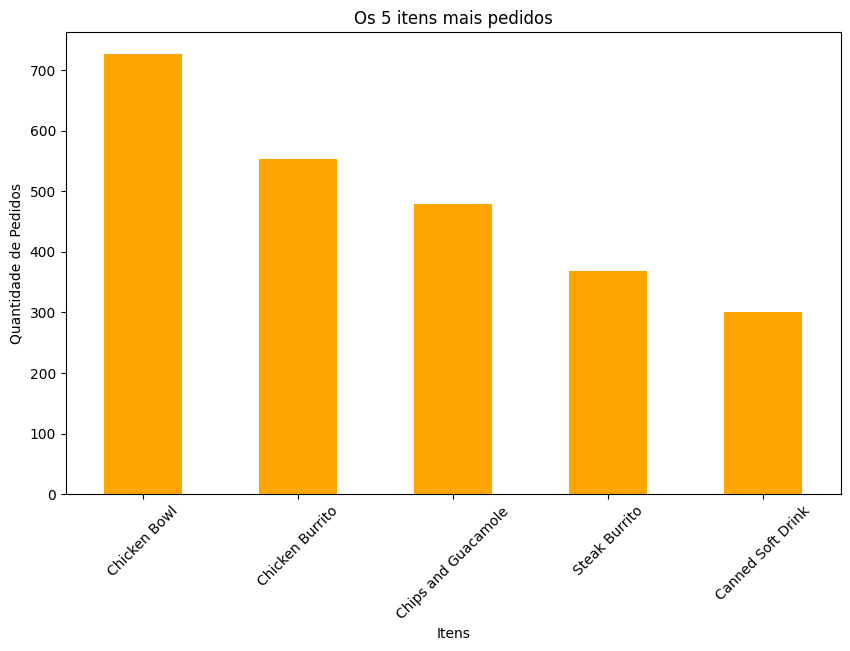

In [ ]:
#Crie um histograma com os 5 produtos mais pedidos.

import matplotlib.pyplot as plt

contagem_itens = chipo['item_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
contagem_itens.plot(kind='bar', color='orange')
plt.title('Os 5 itens mais pedidos')
plt.xlabel('Itens')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.show()



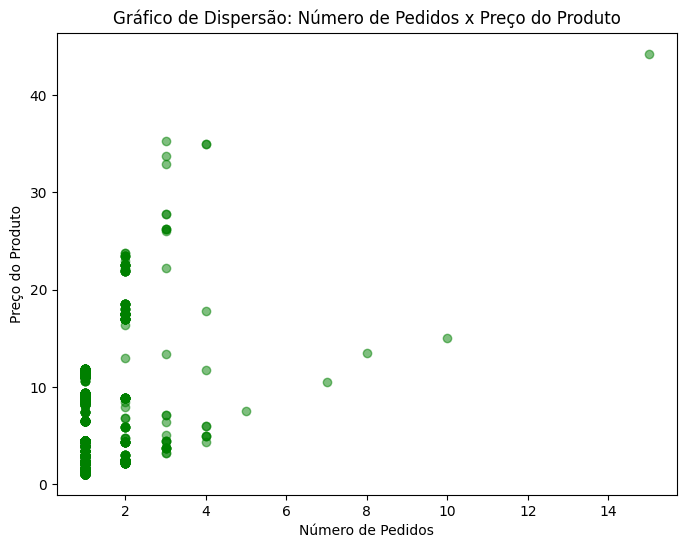

In [ ]:
#Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto

plt.figure(figsize=(8, 6))
plt.scatter(chipo['quantity'], chipo['item_price'], color='green', alpha=0.5)
plt.title('Gráfico de Dispersão: Número de Pedidos x Preço do Produto')
plt.xlabel('Número de Pedidos')
plt.ylabel('Preço do Produto')

plt.show()

Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

Sim, pois pode-se identificar que uma grande parte de produtos numa faixa de ate 10$ são pedidos poucas vezes.